In [109]:
import itertools
from basics import *
from plotting import *
from plotting import savefig
import seaborn as sns

plt.style.use("paper")

In [110]:
root_dir = "../data/facets"
models = sorted(os.listdir(root_dir))
evals = [100, 111, 211, 331, 410, 711]

In [111]:
dfs = []
for m, ev in itertools.product(models, evals):
    _df = pd.read_csv(f"{root_dir}/{m}/{ev}.csv", index_col=0)
    _df["model"] = m
    _df["eval"] = int(ev)
    dfs.append(_df)
df = pd.concat(dfs, axis=0)

In [112]:
df["npred"] = df["pred"] / df["nads"]
df["ntrue"] = df["energy"] / df["nads"]

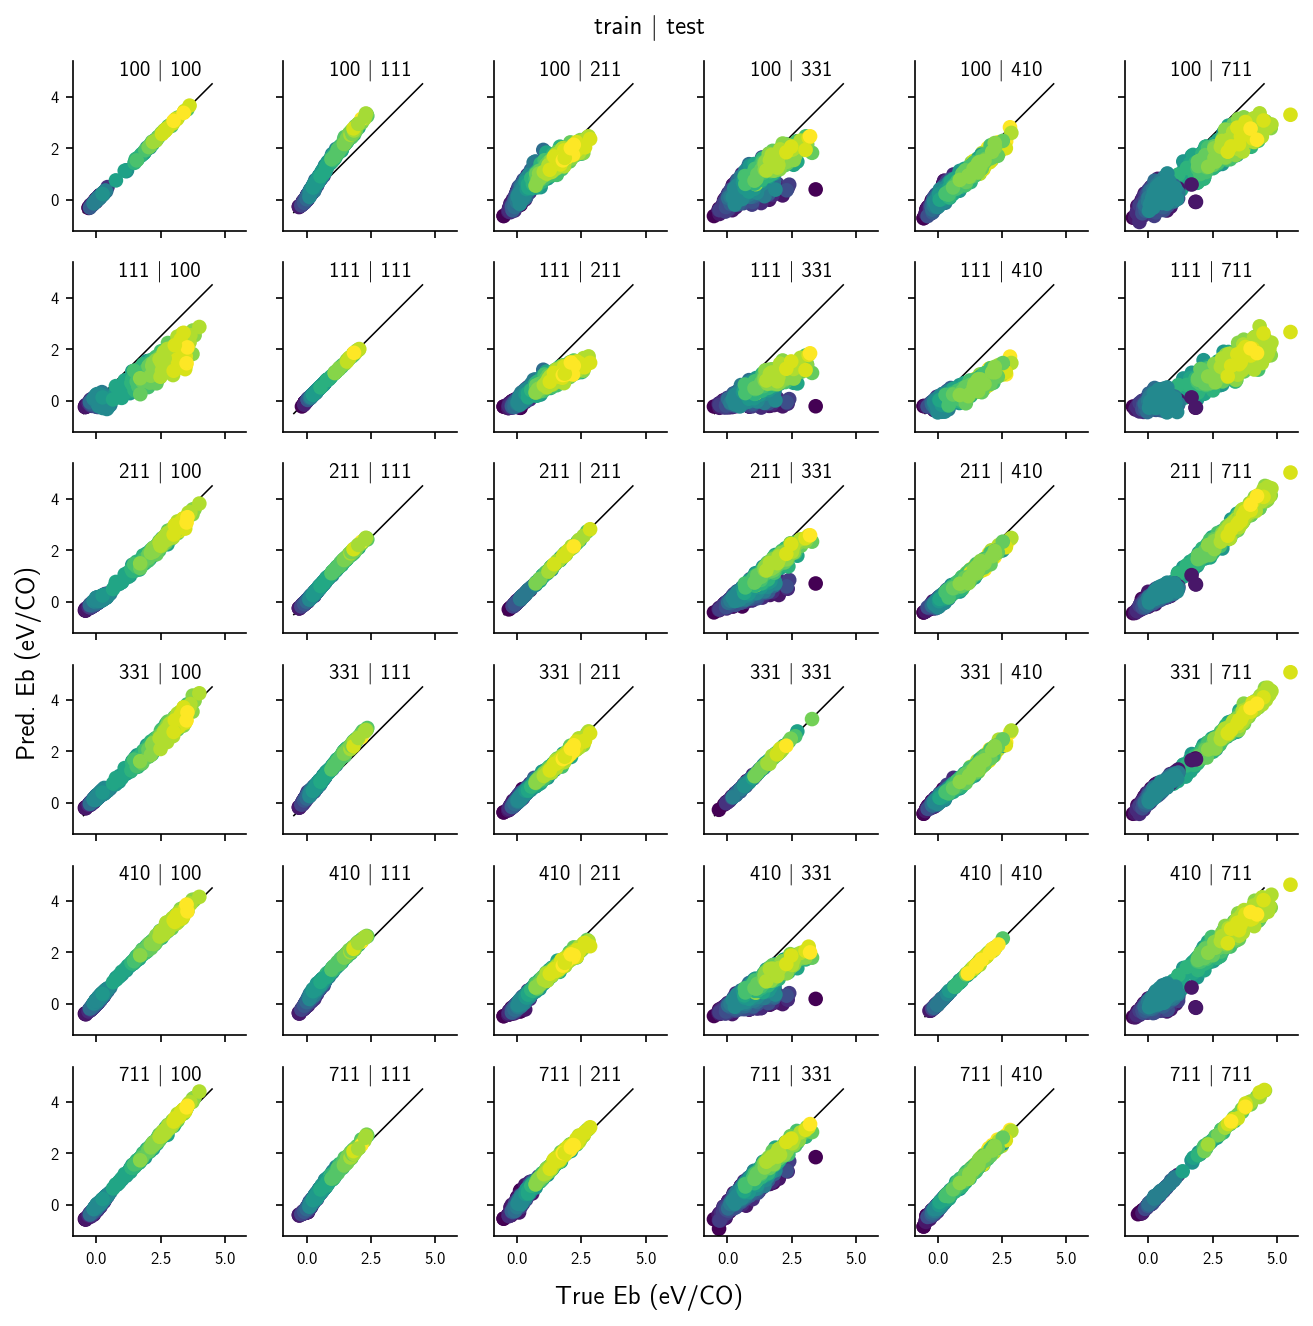

In [105]:
fig, axs = plt.subplots(len(evals), len(evals), figsize=(9, 9), sharex=True, sharey=True)

for i, m in enumerate(evals):
    for j, ev in enumerate(evals):
        ax = axs[i, j]
        _df = df.loc[(df.model == str(m)) & (df["eval"] == ev)]
        ax.scatter(
            _df["ntrue"],
            _df["npred"],
            c=_df["nads"],
        )

        ax.plot(
            [-.5, 4.5],
            [-.5, 4.5],
            "k-",
            linewidth=0.75,
            zorder=-1
        )
        ax.set_aspect("equal")
        
        ax.annotate(f"{m} | {ev}", (0.5, 0.95), xycoords="axes fraction", ha="center", va="center")

fig.suptitle("train | test")
fig.supxlabel("True Eb (eV/CO)", y=0.02)
fig.supylabel("Pred. Eb (eV/CO)", x=0.03)

fig.tight_layout()
savefig(fig, "02-extrapolation-facets.png", dpi=300)
plt.show()

## Computing the RMSE

In [106]:
results = []

for m, ev in itertools.product(evals, repeat=2):        
    _df = df.loc[(df.model == str(m)) & (df["eval"] == ev)]
    err = _df["npred"] - _df["ntrue"]
    rmse = np.sqrt((err ** 2).mean())
    results.append({"model": m, "eval": ev, "rmse": rmse})
    
rmse = pd.DataFrame(results).pivot(columns="eval", index="model", values="rmse")
rmse = rmse * 1000

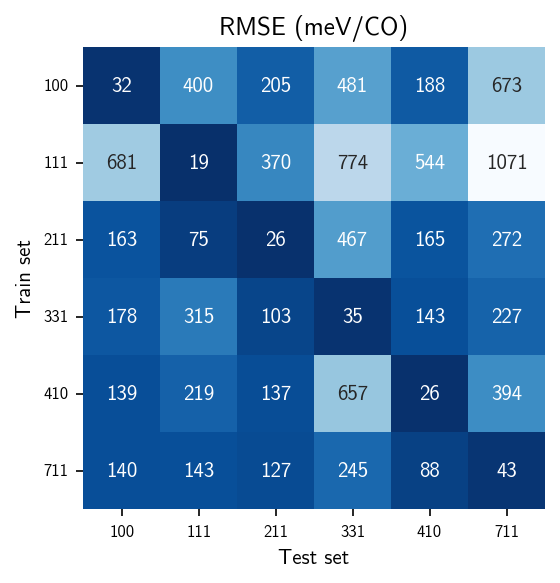

In [108]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.heatmap(rmse, annot=True, fmt=".0f", cbar=False, square=True, ax=ax, cmap="Blues_r")

ax.set_xlabel("Test set")
ax.set_ylabel("Train set")
ax.set_yticklabels(ax.get_xticklabels(), rotation=0)

ax.set_title("RMSE (meV/CO)")
savefig(fig, "02-extrapolation-facets-rmse.pdf")
plt.show()

## Evaluating the model trained both on (100) and (111), and tested on (211)

In [113]:
for ev in evals:
    _df = df.loc[(df.model == "100-111") & (df["eval"] == ev)]
    err = _df["npred"] - _df["ntrue"]
    rmse = np.sqrt((err ** 2).mean())
    
    print()

100: 17 meV/CO
111: 20 meV/CO
211: 168 meV/CO
331: 544 meV/CO
410: 130 meV/CO
711: 420 meV/CO


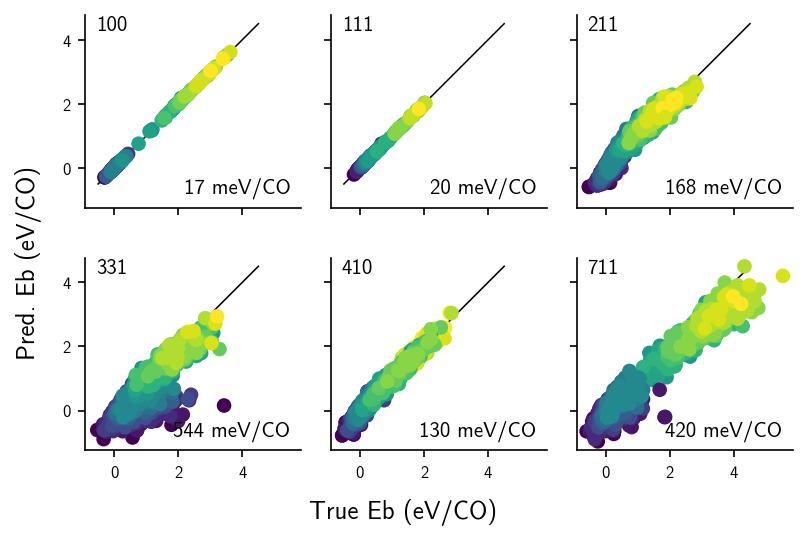

In [117]:
fig, axs = plt.subplots(2, 3, figsize=(5.5, 4), sharex=True, sharey=True)

for ax, ev in zip(axs.reshape(-1), evals):
    _df = df.loc[(df.model == "100-111") & (df["eval"] == ev)]
    ax.scatter(
        _df["ntrue"],
        _df["npred"],
        c=_df["nads"],
    )
    
    err = _df["npred"] - _df["ntrue"]
    rmse = np.sqrt((err ** 2).mean())

    ax.plot(
        [-.5, 4.5],
        [-.5, 4.5],
        "k-",
        linewidth=0.75,
        zorder=-1
    )
    ax.set_aspect("equal")

    
    ax.annotate(ev, (0.05, 0.95), xycoords="axes fraction", ha="left", va="center")
    ax.annotate(
        f"{rmse * 1000:.0f} meV/CO",
        (0.95, 0.1),
        xycoords="axes fraction",
        ha="right",
        va="center"
    )

# fig.suptitle("train | test")
fig.supxlabel("True Eb (eV/CO)", y=0.06)
fig.supylabel("Pred. Eb (eV/CO)", x=0.03)

fig.tight_layout()
savefig(fig, "02-extrapolation-211.png", dpi=300)
plt.show()